In [1]:
# Import Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from datetime import datetime
from tqdm import tqdm
import random
from math import ceil

In [2]:
# Paths

data_dir = "training_data"
processed_data_dir = "processed_data"
raw_data_dirs = ["raw_training_1_91_1st-P__norm-high99",
                 "raw_training_2_173_1st-P__norm-high99",
                 "raw_training_3_74_1st-P__norm-high99",
                 "raw_training_4_8_3th-P__rev-high99",
                 "raw_training_5_109_1st-P__rev-high99",
                 ##"raw_training_6_143_1st-P__rev-high99_noHud",
                 ##"raw_training_7_77_1st-P__norm-high99_noHud",
                 ##"raw_training_8_53_1st-P__norm-high99_noHud",
                 ##"raw_training_9_52_1st-P__rev-high99_noHud",
                ]

raw_data_paths = [os.path.join(data_dir, train_dir) for train_dir in raw_data_dirs]
processed_data_path = os.path.join(data_dir, processed_data_dir)

raw_file_paths = []
for directory in raw_data_paths:
    paths = [os.path.join(directory, file.name) for file in os.scandir(directory)]
    raw_file_paths += paths

random.shuffle(raw_file_paths)

In [33]:
# Process Raw Training Files

# 0) Setup parameters and variables
# 1) Iterate through raw_training_files.
# 2) Blur the keyboard strokes with close instances
# 3) Append file to bigger output file
# 4) Scale input values by 255.
# 5) Shuffle instances within the new files.
# 6) Save new files as processed.

# 0) Set Parameters
blur_321 = list(range(3, 0, -1))
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))

blur = blur_12to1

n_combined_files = 25
n_output_files = ceil(len(raw_file_paths)/n_combined_files)


print(f"[{datetime.now().strftime('%H:%M:%S')}] File Processing is starting...")

# 1) Iterate over number of output files
for j in range(n_output_files):
    blured_train_file = None
    print(f"\n[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] New Array has been created...")
    processed_file_name = f"blured12to1_withHud_25k__{j+1}of{n_output_files}__{datetime.now().strftime('%Y-%m-%d %H-%M-%S')}.npy"
    processed_file_path = os.path.join(processed_data_path, processed_file_name)
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Loading, bluring and appending instances...")
    
    # 1) Iterate over each inp-file of out-file
    for i in range(0, n_combined_files):
        index = j*n_combined_files+i
        if index >= len(raw_file_paths):
               break
        file = np.load(raw_file_paths[index], allow_pickle=True)
        
        # 2) Blur
        blured_keys = blur_lists_of_list([instance[1] for instance in file], blur)
        file = [[file[i][0], blured_keys[i]] for i in range(len(file))]
        del blured_keys
        
        # 3) Append
        if blured_train_file == None:
            blured_train_file = file
        else:
            blured_train_file = np.append(blured_train_file, file, axis=0)
        #print(np.shape(blured_train_file))
        del file

    # 4) Scale
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Data is getting scaled...")
    for i in range(len(blured_train_file)):
        blured_train_file[i][0] = blured_train_file[i][0] / 255
        ##unblured_train_file = blured_train_file.copy()

    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] key strokes are getting blured between frames...")


    # 5) Shuffle
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Instances get shuffled...")
    np.random.shuffle(blured_train_file)

    # 6) Save
    print(f'[{datetime.now().strftime("%H:%M:%S")}][new file {j+1}/{n_output_files}] "{processed_file_name}" is getting saved...this might take a while... (shape={np.shape(blured_train_file)})')
    np.save(processed_file_path, blured_train_file)
    print(f'[{datetime.now().strftime("%H:%M:%S")}][new file {j+1}/{n_output_files}] "{processed_file_name}" has been saved... shape={np.shape(blured_train_file)}')
    del blured_train_file

print("\n\n")
print(f"[{datetime.now().strftime('%H:%M:%S')}]File Processing has been finished...")

# CHECK IF FILE WAS CORRECTLY BLURRED

[13:25:30] File Processing is starting...

[13:25:30][new file 1/19] New Array has been created...
[13:25:30][new file 1/19] Loading, bluring and appending instances...


d:\anaconda\envs\env37\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[13:25:33][new file 1/19] Data is getting scaled...
[13:25:41][new file 1/19] key strokes are getting blured between frames...
[13:25:41][new file 1/19] Instances get shuffled...
[13:25:41][new file 1/19] "blured12to1_withHud_25k__1of19__2021-02-02 13-25-30.npy" is getting saved...this might take a while... (shape=(25000, 2))
[13:25:49][new file 1/19] "blured12to1_withHud_25k__1of19__2021-02-02 13-25-30.npy" has been saved... shape=(25000, 2)

[13:25:54][new file 2/19] New Array has been created...
[13:25:54][new file 2/19] Loading, bluring and appending instances...
[13:25:57][new file 2/19] Data is getting scaled...
[13:26:05][new file 2/19] key strokes are getting blured between frames...
[13:26:05][new file 2/19] Instances get shuffled...
[13:26:05][new file 2/19] "blured12to1_withHud_25k__2of19__2021-02-02 13-25-54.npy" is getting saved...this might take a while... (shape=(25000, 2))
[13:26:13][new file 2/19] "blured12to1_withHud_25k__2of19__2021-02-02 13-25-54.npy" has been saved

[13:35:19][new file 15/19] "blured12to1_withHud_25k__15of19__2021-02-02 13-34-09.npy" has been saved... shape=(25000, 2)

[13:35:25][new file 16/19] New Array has been created...
[13:35:25][new file 16/19] Loading, bluring and appending instances...
[13:36:13][new file 16/19] Data is getting scaled...
[13:36:22][new file 16/19] key strokes are getting blured between frames...
[13:36:22][new file 16/19] Instances get shuffled...
[13:36:22][new file 16/19] "blured12to1_withHud_25k__16of19__2021-02-02 13-35-25.npy" is getting saved...this might take a while... (shape=(25000, 2))
[13:36:34][new file 16/19] "blured12to1_withHud_25k__16of19__2021-02-02 13-35-25.npy" has been saved... shape=(25000, 2)

[13:36:39][new file 17/19] New Array has been created...
[13:36:39][new file 17/19] Loading, bluring and appending instances...
[13:37:25][new file 17/19] Data is getting scaled...
[13:37:30][new file 17/19] key strokes are getting blured between frames...
[13:37:30][new file 17/19] Instances g

In [4]:
# Blur Lists and 2d-Lists

blured_list = []

def blur_list(inp_list, blur_weights):
    blured_list = []
    div_factor = blur_weights[0] + sum(blur_weights[1:]) * 2
    for index in range(len(inp_list)):
        for offset, blur_weight in enumerate(blur_weights):
            if offset == 0:
                blured_val = blur_weight * inp_list[index]
            else:
                if index + offset < len(inp_list):
                    blured_val += blur_weight * inp_list[index+offset]
                else:
                    blured_val += blur_weight * inp_list[index]

                if index - offset >= 0:
                    blured_val += blur_weight * inp_list[index-offset]
                else:
                    blured_val += blur_weight * inp_list[index]
            #print(blured_val)

        blured_val /= div_factor
        blured_list.append(blured_val)
    
    return blured_list
    

def blur_lists_of_list(list2d, blur_weights):
    blured_list = []
    for key_index in range(len(list2d[0])):
        key_list = [instance[key_index] for instance in list2d]
        key_list_blured = blur_list(key_list, blur_weights)
            
        if key_index == 0:
            blured_list = [[val] for val in key_list_blured]
        else:
            for i in range(len(blured_list)):
                blured_list[i].append(key_list_blured[i])
                    
    return blured_list
                    


In [8]:
# Process imported data

proc_file_path = os.path.join(processed_data_path, "blured6to1_withHud_25k__1of19__2021-02-02 12-42-57.npy")

# Load file
training_data = np.load(proc_file_path, allow_pickle=True)
# "Split" into input(X) and output(y)
X = np.array([instance[0] for instance in training_data])
y = np.array([instance[1] for instance in training_data])
## del training_data

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Add dimension for compatibility with keras CNN model
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# delete unused variables for saving ram
del X, y


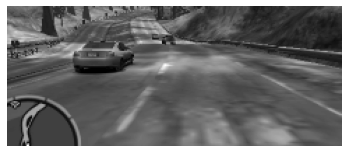

[0.0, 0.0, 0.0, 0.0]


In [30]:
# show a random instance
show_instance(training_data)

In [ ]:
# Create Model

def create_new_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        #keras.layers.Dropout(0.5),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation="linear")
    ])

    model.compile(loss='mae',
                  optimizer='adam',
#                  metrics=['accuracy']
                 )
    return model

In [2]:
# Create Model

def create_deeper_model():
    model = keras.models.Sequential([
        keras.layers.Input(shape=(240, 100, 1)),
        keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Dropout(0.5),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(4, activation="sigmoid")
    ])

    model.compile(loss='mae',
                  optimizer='adam',
                  metrics=['mae', 'mse', 'accuracy']
                 )
    return model

model = create_deeper_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 100, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 50, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 50, 128)      73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 12, 128)       0

In [ ]:
# Train Model

batch_size = 64
epochs = 1
patience = 5
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=patience),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train , y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [56]:
# import batches of data while training model

# Model var
model_dir = "models 1"
exp_model_name = f"model12_withHud_12to1_deeperModel_sigmoid__{datetime.now().strftime('%d-%m-%Y %H-%M-%S')}"
exp_model_path = os.path.join(model_dir, exp_model_name)
use_existing_model = False
imp_model_name = ""
imp_model_path = os.path.join(model_dir, imp_model_name)
model = keras.models.load_model(imp_model_path) if use_existing_model else create_deeper_model()

# Data var
to_import_dir = "import_these_files"
to_import_path = os.path.join(processed_data_path, to_import_dir)
proc_files_paths = [os.path.join(to_import_path, file.name) for file in os.scandir(to_import_path)]

# Training var
batch_size = 64
dataset_epochs = 3
file_epochs = 3
test_size = 0.1
patience = 10
my_callbacks = [
    ##tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
    ##tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    ##tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
histories = []
file_cnt = 0


print(f"[{datetime.now().strftime('%H:%M:%S')}] Training is starting...")

for epoch in range(dataset_epochs):
    print(f"\n\n[{datetime.now().strftime('%H:%M:%S')}] Epoch {epoch+1} of {dataset_epochs} is starting...")
    file_cnt = 0
    np.random.shuffle(proc_files_paths)
    for file_path in proc_files_paths:
        file_cnt += 1
        print(f'\n[{datetime.now().strftime("%H:%M:%S")}][epoch {epoch+1}/{dataset_epochs} | file {file_cnt}/{len(proc_files_paths)}] Loading and preparing "{os.path.basename(file_path)}"...')
        
        # Load file
        training_data = np.load(file_path, allow_pickle=True)
        
        # "Split" into input(X) and output(y)
        X = np.array([instance[0] for instance in training_data])
        y = np.array([instance[1] for instance in training_data])
        del training_data
        
        # Create train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        del X, y

        # Add dimension for compatibility with keras CNN model
        X_train = np.expand_dims(X_train, -1)
        X_test = np.expand_dims(X_test, -1)
        
        # Train Model
        print(f"[{datetime.now().strftime('%H:%M:%S')}][epoch {epoch+1}/{dataset_epochs} | file {file_cnt}/{len(proc_files_paths)}] Training model...")
        history = model.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=file_epochs,
                            validation_data=(X_test, y_test),
                            verbose=1)
        
        # Save Model
        print(f"[{datetime.now().strftime('%H:%M:%S')}][epoch {epoch+1}/{dataset_epochs} | file {file_cnt}/{len(proc_files_paths)}] Saving model and appending history...")
        histories.append(history)
        model.save(exp_model_path)
        
        del X_train, X_test, y_train, y_test
        
print(f"\n\n[{datetime.now().strftime('%H:%M:%S')}] Training has been finished...")


[14:19:18] Training is starting...


[14:19:18] Epoch 1 of 3 is starting...

[14:19:18][epoch 1/3 | file 1/19] Loading and preparing "blured12to1_withHud_25k__18of19__2021-02-02 13-37-51.npy"...
[14:19:41][epoch 1/3 | file 1/19] Training model...
Epoch 1/3
352/352 [==============================] - 34s 97ms/step - loss: 0.0685 - mae: 0.0685 - mse: 0.0300 - accuracy: 0.9471 - val_loss: 0.0674 - val_mae: 0.0674 - val_mse: 0.0298 - val_accuracy: 0.9456
Epoch 2/3
352/352 [==============================] - 34s 96ms/step - loss: 0.0669 - mae: 0.0669 - mse: 0.0294 - accuracy: 0.9486 - val_loss: 0.0674 - val_mae: 0.0674 - val_mse: 0.0298 - val_accuracy: 0.9456
Epoch 3/3
352/352 [==============================] - 34s 97ms/step - loss: 0.0669 - mae: 0.0669 - mse: 0.0294 - accuracy: 0.9486 - val_loss: 0.0674 - val_mae: 0.0674 - val_mse: 0.0298 - val_accuracy: 0.9456
[14:21:24][epoch 1/3 | file 1/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_

352/352 [==============================] - 34s 97ms/step - loss: 0.0657 - mae: 0.0657 - mse: 0.0280 - accuracy: 0.9604 - val_loss: 0.0659 - val_mae: 0.0659 - val_mse: 0.0288 - val_accuracy: 0.9604
Epoch 2/3
352/352 [==============================] - 35s 98ms/step - loss: 0.0657 - mae: 0.0657 - mse: 0.0280 - accuracy: 0.9604 - val_loss: 0.0659 - val_mae: 0.0659 - val_mse: 0.0288 - val_accuracy: 0.9604
Epoch 3/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0657 - mae: 0.0657 - mse: 0.0280 - accuracy: 0.9604 - val_loss: 0.0659 - val_mae: 0.0659 - val_mse: 0.0288 - val_accuracy: 0.9604
[14:45:22][epoch 1/3 | file 13/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_12to1_deeperModel_sigmoid__02-02-2021 14-19-18\assets

[14:45:24][epoch 1/3 | file 14/19] Loading and preparing "blured12to1_withHud_25k__16of19__2021-02-02 13-35-25.npy"...
[14:45:46][epoch 1/3 | file 14/19] Training model...
Epoch 1/3
352/352 [==========


[15:09:31][epoch 2/3 | file 7/19] Loading and preparing "blured12to1_withHud_25k__4of19__2021-02-02 13-27-15.npy"...
[15:09:53][epoch 2/3 | file 7/19] Training model...
Epoch 1/3
352/352 [==============================] - 34s 97ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0257 - accuracy: 0.9586 - val_loss: 0.0636 - val_mae: 0.0636 - val_mse: 0.0261 - val_accuracy: 0.9596
Epoch 2/3
352/352 [==============================] - 35s 98ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0257 - accuracy: 0.9586 - val_loss: 0.0636 - val_mae: 0.0636 - val_mse: 0.0261 - val_accuracy: 0.9596
Epoch 3/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0257 - accuracy: 0.9586 - val_loss: 0.0636 - val_mae: 0.0636 - val_mse: 0.0261 - val_accuracy: 0.9596
[15:11:38][epoch 2/3 | file 7/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_12to1_deeperModel_sigmoid__02-02-2021 14-19-18\assets

[15:11:40][epoch 2/3 |

[15:37:27][epoch 2/3 | file 19/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_12to1_deeperModel_sigmoid__02-02-2021 14-19-18\assets


[15:37:29] Epoch 3 of 3 is starting...

[15:37:29][epoch 3/3 | file 1/19] Loading and preparing "blured12to1_withHud_25k__14of19__2021-02-02 13-32-59.npy"...
[15:37:45][epoch 3/3 | file 1/19] Training model...
Epoch 1/3
352/352 [==============================] - 34s 97ms/step - loss: 0.0672 - mae: 0.0672 - mse: 0.0310 - accuracy: 0.9430 - val_loss: 0.0689 - val_mae: 0.0689 - val_mse: 0.0326 - val_accuracy: 0.9388
Epoch 2/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0672 - mae: 0.0672 - mse: 0.0310 - accuracy: 0.9430 - val_loss: 0.0689 - val_mae: 0.0689 - val_mse: 0.0326 - val_accuracy: 0.9388
Epoch 3/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0672 - mae: 0.0672 - mse: 0.0310 - accuracy: 0.9430 - val_loss: 0.0689 - val_mae: 0.0689 - val_mse: 0.0326 - v

352/352 [==============================] - 34s 97ms/step - loss: 0.0649 - mae: 0.0649 - mse: 0.0295 - accuracy: 0.9411 - val_loss: 0.0632 - val_mae: 0.0632 - val_mse: 0.0279 - val_accuracy: 0.9444
Epoch 2/3
352/352 [==============================] - 35s 98ms/step - loss: 0.0649 - mae: 0.0649 - mse: 0.0295 - accuracy: 0.9411 - val_loss: 0.0632 - val_mae: 0.0632 - val_mse: 0.0279 - val_accuracy: 0.9444
Epoch 3/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0649 - mae: 0.0649 - mse: 0.0295 - accuracy: 0.9411 - val_loss: 0.0632 - val_mae: 0.0632 - val_mse: 0.0279 - val_accuracy: 0.9444
[15:52:18][epoch 3/3 | file 7/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_12to1_deeperModel_sigmoid__02-02-2021 14-19-18\assets

[15:52:20][epoch 3/3 | file 8/19] Loading and preparing "blured12to1_withHud_25k__13of19__2021-02-02 13-32-25.npy"...
[15:52:42][epoch 3/3 | file 8/19] Training model...
Epoch 1/3
352/352 [=============

[16:05:12][epoch 3/3 | file 13/19] Saving model and appending history...
INFO:tensorflow:Assets written to: models 1\model12_withHud_12to1_deeperModel_sigmoid__02-02-2021 14-19-18\assets

[16:05:13][epoch 3/3 | file 14/19] Loading and preparing "blured12to1_withHud_25k__4of19__2021-02-02 13-27-15.npy"...
[16:05:36][epoch 3/3 | file 14/19] Training model...
Epoch 1/3
352/352 [==============================] - 34s 97ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0259 - accuracy: 0.9584 - val_loss: 0.0611 - val_mae: 0.0611 - val_mse: 0.0250 - val_accuracy: 0.9612
Epoch 2/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0259 - accuracy: 0.9584 - val_loss: 0.0611 - val_mae: 0.0611 - val_mse: 0.0250 - val_accuracy: 0.9612
Epoch 3/3
352/352 [==============================] - 35s 99ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0259 - accuracy: 0.9584 - val_loss: 0.0611 - val_mae: 0.0611 - val_mse: 0.0250 - val_accuracy: 0.9612
[16:07:22][epoch 3/3

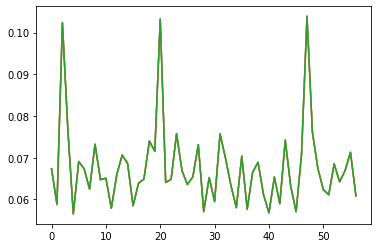

In [57]:
# print(history.history['val_loss'])
# plt.plot(history.history['val_loss'])
# plt.show()
plt.plot([hist.history['val_loss'] for hist in histories])
# plt.plot(histories[0].history["val_loss"])

In [24]:
def show_instance(data, index=None):
    if index == None:
        index = random.randrange(len(data))
    plt.imshow(data[index][0], cmap="gray")
    plt.axis("off")
    plt.show()
    print(data[index][1])

In [ ]:
def show_instance_with_prediction(X_test, y_test, predictions, rand=True):
    index = random.randrange(len(X_test))
    plt.imshow(X_test[index], cmap="gray")
    plt.axis("off")
    plt.show()
    print(f"Predicted y: {[round(item, 2) for item in predictions[index]]}")
    print(f"Actual y: {y_test[index]}")

In [48]:
load_model_path = "models 1\\Full_Big_unbalanced_6to1_model_linear 11-11-2020 00-35-04"
model = keras.models.load_model(load_model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 240, 64)      3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 120, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 120, 128)      73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 120, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 60, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 192000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

# Preprocess raw files on the hhd and save them on the ssd

### functions

In [ ]:
def _hdd_parse_function(example_proto):
    feature_description = {
        "image_raw": FixedLenFeature([], tf.string),
        "label" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def hdd_decode_tfrecord(inst):
    inst["image_raw"] = tf.io.parse_tensor(inst["image_raw"], out_type=tf.uint8)
    inst["label"] = tf.io.parse_tensor(inst["label"], out_type=tf.float32)
    return inst


def dataset_to_tensors(ds):
    X, y = [], []
    for instance in ds:
        X.append(instance["image_raw"])
        y.append(instance["label"])
    return tf.stack(X), tf.stack(y)


def create_example(pov_img, nav_img, spd, blur6, blur12, blur24, blur36):
    pov_img = tf.convert_to_tensor(pov_img, dtype=tf.uint8)
    nav_img = tf.convert_to_tensor(nav_img, dtype=tf.uint8)
    spd = tf.convert_to_tensor(spd, dtype=tf.float32)
    blur6 = tf.convert_to_tensor(blur6, dtype=tf.float32)
    blur12 = tf.convert_to_tensor(blur12, dtype=tf.float32)
    blur24 = tf.convert_to_tensor(blur24, dtype=tf.float32)
    blur36 = tf.convert_to_tensor(blur36, dtype=tf.float32)

    features = {
            "pov": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(pov_img).numpy()])),
            "nav": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(nav_img).numpy()])),
            "spd": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(spd).numpy()])),
            "blured6_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur6).numpy()])),
            "blured12_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur12).numpy()])),
            "blured24_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur24).numpy()])),
            "blured36_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur36).numpy()])),
            }

    return Example(features=Features(feature=features))


def blur_1d(inp_list, blur_weights):
    blured_list = []
    div_factor = blur_weights[0] + sum(blur_weights[1:]) * 2
    for index in range(len(inp_list)):
        for offset, blur_weight in enumerate(blur_weights):
            if offset == 0:
                blured_val = blur_weight * inp_list[index]
            else:
                if index + offset < len(inp_list):
                    blured_val += blur_weight * inp_list[index+offset]
                else:
                    blured_val += blur_weight * inp_list[index]

                if index - offset >= 0:
                    blured_val += blur_weight * inp_list[index-offset]
                else:
                    blured_val += blur_weight * inp_list[index]
            #print(blured_val)

        blured_val /= div_factor
        blured_list.append(blured_val)
    
    return blured_list
    

def blur_2d(list2d, blur_weights):
    blured_list = []
    for key_index in range(list2d.shape[1]):
        key_list = [instance[key_index] for instance in list2d]
        key_list_blured = blur_1d(key_list, blur_weights)
            
        if key_index == 0:
            blured_list = [[val] for val in key_list_blured]
        else:
            for i in range(len(blured_list)):
                blured_list[i].append(key_list_blured[i])
                    
    return blured_list


def detect_speed(img, debugging=False):  
    relative_pixel_positions = [((0, 2),(0, 7)),
                            ((2, 0),(5, 0)),
                            ((2, 10),(5, 10)),
                            ((7, 2),(8, 6)),
                            ((10, 0),(14, 0)),
                            ((10, 10),(14, 10)),
                            ((16, 2),(16, 7)),
                           ]
    pos_ref_1 = (2, 7)
    pos_ref_2 = (14, 2)
    
    offset_num1 = (399, 520)
    offset_num2 = (399, 537)
    offset_num3 = (399, 554)

    offsets = [offset_num1, offset_num2, offset_num3]
    
    nothing = [0, 0, 0, 0, 0, 0, 0]
    zero = [1, 1, 1, 0, 1, 1, 1]
    one = [0, 0, 1, 0, 0, 1, 0] 
    two = [1, 0, 1, 1, 1, 0, 1]
    three = [1, 0, 1, 1, 0, 1, 1]
    four = [0, 1, 1, 1, 0, 1, 0]
    five = [1, 1, 0, 1, 0, 1, 1]
    six = [1, 1, 0, 1, 1, 1, 1]
    seven = [1, 0, 1, 0, 0, 1, 0]
    eight = [1, 1, 1, 1, 1, 1, 1]
    nine = [1, 1, 1, 1, 0, 1, 1]
    
    pixel_mean_threshold = tf.cast(10, tf.float32)
    
    speed = ""

    for offset in offsets:
        tacho_code = []
        # Reference Pixels
        h_ref1 = offset[0] + pos_ref_1[0]
        w_ref1 = offset[1] + pos_ref_1[1]
        h_ref2 = offset[0] + pos_ref_2[0]
        w_ref2 = offset[1] + pos_ref_2[1]
        ref1 = tf.math.reduce_mean(img[h_ref1, w_ref1])
        ref2 = tf.math.reduce_mean(img[h_ref2, w_ref2])
        reference = tf.cast(tf.math.reduce_mean([ref1, ref2]), tf.float32)
        
        for positions in relative_pixel_positions:
            values = []
            for position in positions:
                h_index = position[0]+offset[0]
                w_index = position[1]+offset[1]
                values.append(img[h_index, w_index].numpy())
            mean = tf.cast(tf.math.reduce_mean(values), tf.float32)
            if mean < pixel_mean_threshold or mean*4 < reference:
                tacho_code.append(1)
            else:
                tacho_code.append(0)

        if tacho_code == nothing or tacho_code == zero:
            speed += "0"
        elif tacho_code == one:
            speed += "1"
        elif tacho_code == two:
            speed += "2"
        elif tacho_code == three:
            speed += "3"
        elif tacho_code == four:
            speed += "4"
        elif tacho_code == five:
            speed += "5"
        elif tacho_code == six:
            speed += "6"
        elif tacho_code == seven:
            speed += "7"
        elif tacho_code == eight:
            speed += "8"
        elif tacho_code == nine:
            speed += "9"
        
        elif len(speed) >= 2:
            speed += "5"
            break
            
        elif len(speed) == 1:
            speed += "50"
            break
            
        elif len(speed) == 0:
            if debugging:
                print(f"SPEED-O-METER DETECTION ERROR")
                print(f"The first digit couldn't be detected. Setting speed to 220")
                print("Tacho_code =", tacho_code)
                raise Exception()
            speed += "220"
            break
            
        else:
            if debugging:
                print(f"SPEED-O-METER DETECTION ERROR")
                print("Tacho code is invalid.")
                print("Reference ==", reference)
                print("Tacho_code =", tacho_code)
                raise Exception()
            speed += "220"
            break

    speed = int(speed)
    
    if speed > 420:
        if debugging:
            print(f"SPEED-O-METER DETECTION ERROR")
            print(f'The detected speed of {speed} km/h seems to be a detection error. Setting speed to 220')
            raise Exception()
        speed = 220
        
    return speed


### Process-Export Loop

In [ ]:
# base paths
hdd_base_path = "H:\\Programming\\My Projects\\NFSMW-AI"
ssd_base_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"
# Files get saved to this folder
processed_files_dir = "training_data\\processed_data\\big_records_preprocessed\\"
# pattern of raw files
raw_files_pattern = "raw_training_data\\*\\*.tfrecord"
# change current directory to hdd
os.chdir(hdd_base_path)
# collect file names that match the pattern
raw_file_paths = tf.data.Dataset.list_files(raw_files_pattern)

# SET VARIABLES for Operations
# instances per new file
instances_per_new_file = 1000

# Amount of blur applied to the keys across instances
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))
blur_36to1 =list(range(36, 0, -1))

# maximum number of keys in the data
n_keys = 5

# Amount of instances ignored at the beginning and end of raw files
cut_off = 50

# Map Size
nav_size = (112, 112)

# pov crop box (offset==top-left corner)
offset_height = 130
offset_width = 46
target_height = 324
target_width = 548

# number instances to skip when iterating over data
n_skip_instances = 1
step_size = n_skip_instances + 1

for raw_file_path in raw_file_paths:
    # set current directory to hdd (for loading)
    os.chdir(hdd_base_path)
    
    # import and parse one file
    dataset = tf.data.TFRecordDataset(raw_file_path)
    dataset = dataset.map(_hdd_parse_function, num_parallel_calls=-1)
    dataset = dataset.map(hdd_decode_tfrecord, num_parallel_calls=-1)
    
    # turn dataset into tensors
    # pov==first person view ; keys==keys being pressed
    pov, keys = dataset_to_tensors(dataset)
    
    if pov.shape[0] < instances_per_new_file * step_size + cut_off * 2:
        continue
    
    # if keys don't include nitro add a zero
    while keys.shape[1] < n_keys:
        keys = tf.concat([keys, tf.zeros(keys.shape, tf.float32)[:,-1:]], 1)
    
    # blur keys across instances
    blured6_keys = blur_2d(keys, blur_6to1)
    blured12_keys = blur_2d(keys, blur_12to1)
    blured24_keys = blur_2d(keys, blur_24to1)
    blured36_keys = blur_2d(keys, blur_36to1)
    
    # eather pressing the left or right key
    blured6_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured6_keys]
    blured12_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured12_keys]
    blured24_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured24_keys]
    blured36_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured36_keys]
    
    # remove first and last couple instances
    pov = pov[cut_off:-cut_off]
    blured6_keys = blured6_keys[cut_off:-cut_off]
    blured12_keys = blured12_keys[cut_off:-cut_off]
    blured24_keys = blured24_keys[cut_off:-cut_off]
    blured36_keys = blured36_keys[cut_off:-cut_off]
    
    # extract map(nav) from pov
    nav = pov[:,307:453,26:172,:]
    # resize map(nav)
    nav = tf.image.resize(nav, nav_size)
    nav = tf.cast(nav, tf.uint8)
    
    # censor map (nav) in pov with a random uniform value
    pov = tf.Variable(pov)
    pov[:,307:453,26:172,:].assign(tf.cast(tf.random.normal(pov[:,307:453,26:172,:].shape)*255, dtype=tf.uint8))
    pov = tf.convert_to_tensor(pov)
    
    # determine speed
    spd = []
    for instance in pov:
        spd.append(detect_speed(instance))
    
    # crop pov to bounding box
    pov = tf.image.crop_to_bounding_box(pov, offset_height, offset_width, target_height, target_width)
    
    # tensors into variables
    pov = tf.Variable(pov)
    nav = tf.Variable(nav)
    spd = tf.cast(spd, tf.float32)
    spd = tf.Variable(spd)
    blured6_keys = tf.Variable(blured6_keys)
    blured12_keys = tf.Variable(blured12_keys)
    blured24_keys = tf.Variable(blured24_keys)
    blured36_keys = tf.Variable(blured36_keys)
    
    # set current directory to ssd (for saving)
    os.chdir(ssd_base_path)
    
    # save instances to file
    file_count = 0
    # save to new files While there are enough instances
    while pov.shape[0] >= instances_per_new_file * step_size:
        file_count += 1
        file_name = f"{file_count}_" + os.path.basename(raw_file_path.numpy()).decode("utf-8")
        file_path = os.path.join(processed_files_dir, file_name)
        with tf.io.TFRecordWriter(file_path) as writer:
            for i in range(0, instances_per_new_file*step_size, step_size):
                tf_example = create_example(pov[i], nav[i], spd[i],
                                            blured6_keys[i], blured12_keys[i], blured24_keys[i], blured36_keys[i])
                writer.write(tf_example.SerializeToString())
        
        # remove already saved instances
        n_remove = instances_per_new_file * step_size
        pov = pov[n_remove:]
        nav = nav[n_remove:]
        spd = spd[n_remove:]
        blured6_keys = blured6_keys[n_remove:]
        blured12_keys = blured12_keys[n_remove:]
        blured24_keys = blured24_keys[n_remove:]
        blured36_keys = blured36_keys[n_remove:]

os.chdir(ssd_base_path)


In [7]:
a = ["w", "a", "s", "d"]
print(a[3])

d
